In [114]:
import os
from skimage.color import rgb2hsv, gray2rgb , rgb2gray
from skimage import io
from scipy import ndimage
import numpy as np
import cv2
import matplotlib.pyplot as plt
import copy
import time 
from skimage.segmentation import flood, flood_fill


Number of blobls: 1009
(720, 1280)


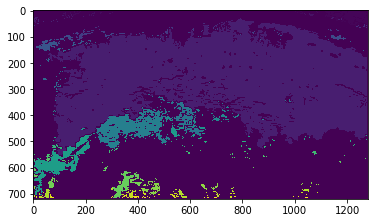

[  0   0 955 ...   0   0   0]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


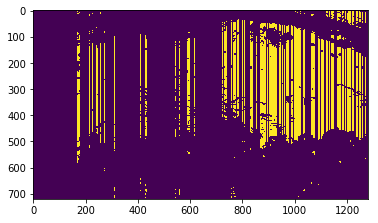

In [115]:
%matplotlib inline
import scipy
from scipy import ndimage
import matplotlib.pyplot as plt

mask = np.load('mask.npy') 

blobs, number_of_blobs = ndimage.label(mask)
print('Number of blobls:', number_of_blobs)
print(np.shape(mask))
# print(np.argwhere(mask==0))
plt.imshow(blobs)
plt.show() 
print(blobs[710]) 
mask = mask.transpose() 
print(blobs.imag)
for idx in range(0,number_of_blobs): 
    idxs = np.argwhere(blobs==idx)
    threat_level = len(idxs)  
#     print(threat_level)
    if threat_level < 10: 
        ### then not dangerous patch of water ###  
#         print(idxs)
        mask[idxs]=0 
mask = mask.transpose()
plt.imshow(mask)
plt.show() 

In [130]:
mask = np.load('mask.npy')*255.0
import numpy as np
import matplotlib.pyplot as plt

from skimage.data import camera
from skimage.filters import roberts, sobel, sobel_h, sobel_v, scharr

image = camera() 
edge_roberts = roberts(mask)
edge_sobel = sobel(mask)
edge_sobel2 = sobel_h(mask)
edge_sobel3 = sobel_v(mask)
r = scharr(mask)
print(np.unique(edge_sobel))
print(np.unique(edge_sobel2))
print(np.unique(edge_sobel3))
print(np.unique(r))


[  0.          63.75        90.1561146  127.5        142.54933357
 180.3122292  191.25       201.59520084]
[-255.   -191.25 -127.5   -63.75    0.     63.75  127.5   191.25  255.  ]
[-255.   -191.25 -127.5   -63.75    0.     63.75  127.5   191.25  255.  ]
[  0.          45.0780573   47.8125      67.61708595  85.82606411
 111.5625     112.69514325 121.37638387 131.42399182 150.35407429
 159.375      166.39238499 180.3122292  207.1875     212.63277102]


In [79]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

def imshow_components(labels,img,idx):
    # Map component labels to hue val
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2RGB)

    labeled_img[label_hue==0] = 0
    idxs = np.argwhere(labeled_img>0) 
    plt.scatter(idxs[:, 1], idxs[:, 0], c='blue', s=1, label='Fusion Cue') 
    plt.imshow(img)
#     plt.show()
    plt.savefig('area_filtered_image_'+str(x).zfill(2)+'.png')



def plt_mask(mask,img,idx):   
    idxs = np.argwhere(mask==1) 
    plt.scatter(idxs[:, 1], idxs[:, 0], c='blue', s=1, label='Fusion Cue') 
    plt.imshow(img)
#     plt.show() 
    plt.savefig('not_cleaned__predected_image_'+str(x).zfill(2)+'.png')

    
for xx in range(0,11):    
    mask1 = np.load('down_sampled_imgs/masks/mask_'+str(xx).zfill(2)+'.npy')

    mask = cv2.blur(mask1,(51,51)) 

    img = cv2.imread('down_sampled_imgs/img_'+str(xx).zfill(2)+'.png') #     RGB_img = cv2.cvtColor(labeled_img, cv2.COLOR_BGR2RGB)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    w,l = np.shape(mask) 
    
    for xidx in range(0,120): 
        for yidx in range(0,120):
            if(xidx+yidx)<121: 
                mask[xidx,yidx] = 0 
                mask[xidx,-yidx] = 0 

    output = cv2.connectedComponentsWithStats(mask,connectivity=8)


    num_labels = output[0] 
    # The second cell is the label matrix
    labels = output[1]
    # The third cell is the stat matrix
    stats = output[2]
    # The fourth cell is the centroid matrix
    centroids = output[3]

    filtered = 0 
    print(np.unique(stats[:,-1]))
    for i in range(0,num_labels): 
        area = stats[i,-1]  
        if area < 800: 
            idxs = np.argwhere(labels==i)
            labels = np.transpose(labels)
            labels[idxs] = 0  
            labels= np.transpose(labels) 
            filtered+=1 
        else: 
            font = cv2.FONT_HERSHEY_COMPLEX  
            x,y=((centroids[i]))
            cv2.putText(labels, str(area) , (int(x),int(y)), font, 1, (0, 255, 0)) 
    plt_mask(mask=mask1,img=img,idx=xx)
#     print('batches left ',num_labels-filtered)
    imshow_components(labels,img,idx=xx)  

[ 96814 133586]
[  1583   1667   2586 224564]
[    57  61327 169016]
[     2    344    402  11037 218615]
[ 47217 183183]
[ 89684 140716]
[  2925  38521 188954]
[    29     51  29828 200492]
[    19   5177  24778 200426]
[     1     16     92    242  15654  74556 139839]
[ 59133 171267]
